# Import Required Libraries and Load the Dataset



In [79]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [80]:
# Load the dataset
file_path = r"C:\Users\satanister\Desktop\NaDIA2018.csv"
df = pd.read_csv(file_path)

In [81]:
# Initial view of the dataset
print("Shape of the dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nFirst 5 Rows:")
display(df.head())

Shape of the dataset: (185, 25)

Column Names:
 ['Hospital_Name', 'Hospital_ID', 'Audit_Year', 'Hospital beds', 'Diabetes patients (BA 2017)', 'DISN hours', 'DSN hours', 'Specialist diabetes dietitian hours', 'Non-specialist dietitian hours', 'Podiatrist hours', 'Pharmacist hours', 'Consultant hours', '7 day DISN cover?', '7 day diabetes physician access?', 'Regular diabetes mortality and morbidity meetings?', 'Regular ward nurse diabetes training?', 'Systems/tools to increase foot exams?', 'Established MDFT?', 'Using Electronic Patient Record?', 'Using electronic prescribing?', 'Using remote blood glucose monitoring?', 'Successfully applied for MDFT Transformation Funding?', 'Successfully applied for DISN Transformation Funding?', 'Used MDFT Transformation Funding to fund additional posts?', 'Used DISN Transformation Funding to fund additional posts?']

First 5 Rows:


,Hospital_Name,Hospital_ID,Audit_Year,Hospital beds,Diabetes patients (BA 2017),DISN hours,DSN hours,Specialist diabetes dietitian hours,Non-specialist dietitian hours,Podiatrist hours,...,Regular ward nurse diabetes training?,Systems/tools to increase foot exams?,Established MDFT?,Using Electronic Patient Record?,Using electronic prescribing?,Using remote blood glucose monitoring?,Successfully applied for MDFT Transformation Funding?,Successfully applied for DISN Transformation Funding?,Used MDFT Transformation Funding to fund additional posts?,Used DISN Transformation Funding to fund additional posts?
0,Addenbrooke's Hospital,RGT01,2018,864,131.0,1.15,0.00,0.37,0.00,0.29,...,Yes,No,Yes,Yes,Yes,Yes,Not applicable,Not applicable,Not applicable,Not applicable
1,Airedale General Hospital,RCF22,2018,304,52.0,1.44,0.72,0.72,0.00,0.07,...,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes: Some / all in post,Yes: Some / all in post
2,Alexandra Hospital,RWP01,2018,284,47.0,1.12,0.00,0.00,0.08,0.08,...,Yes,No,Yes,Partially,No,Partially,Yes,No,Yes: Some / all in post,Not applicable
3,Ashford and St Peter's Hospitals NHS Foundatio...,RTK,2018,414,69.0,0.76,0.00,0.00,0.00,0.03,...,Yes,No,Yes,Yes,No,Partially,No,No,Not applicable,Not applicable
4,Barnsley Hospital,RFFAA,2018,344,74.0,0.38,0.00,0.05,0.00,0.08,...,No,Yes,Yes,Partially,No,Partially,No,No,Not applicable,Not applicable


In [82]:
# Basic info about data types and nulls
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 25 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Hospital_Name                                               185 non-null    object 
 1   Hospital_ID                                                 185 non-null    object 
 2   Audit_Year                                                  185 non-null    int64  
 3   Hospital beds                                               185 non-null    object 
 4   Diabetes patients (BA 2017)                                 182 non-null    float64
 5   DISN hours                                                  182 non-null    float64
 6   DSN hours                                                   182 non-null    float64
 7   Specialist diabetes dietitian hours                         182 non-null  

# Data Overview and Preparation

In [83]:
# Count unique values in all object columns
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    print(f"{col}: {df[col].unique()}")


Hospital_Name: ["Addenbrooke's Hospital" 'Airedale General Hospital' 'Alexandra Hospital'
 "Ashford and St Peter's Hospitals NHS Foundation Trust"
 'Barnsley Hospital' 'Basildon University Hospital'
 'Basingstoke and North Hampshire Hospital' 'Bassetlaw Hospital'
 'Bedford Hospital' 'Blackpool Victoria Hospital'
 'Bradford Teaching Hospitals NHS Foundation Trust'
 'Bronglais General Hospital' 'Broomfield Hospital'
 'Buckinghamshire Healthcare NHS Trust' 'Calderdale Royal Hospital'
 'Chelsea and Westminster Hospital' 'Cheltenham General Hospital'
 'Chesterfield Royal Hospital' 'Chorley and South Ribble Hospital'
 'Churchill Hospital' 'City Hospital'
 'Colchester General Hospital and Essex County Hospital'
 'Conquest Hospital' 'Countess of Chester Hospital'
 'Croydon University Hospital' 'Cumberland Infirmary'
 'Darent Valley Hospital' 'Darlington Memorial Hospital'
 'Derriford Hospital' 'Diana, Princess of Wales Hospital'
 'Doncaster Royal Infirmary' 'Dorset County Hospital' 'Ealing Hos

In [84]:
# Count nulls in each column
missing_counts = df.isnull().sum()
print("Missing Values:\n", missing_counts[missing_counts > 0])


Missing Values:
 Diabetes patients (BA 2017)            3
DISN hours                             3
DSN hours                              3
Specialist diabetes dietitian hours    3
Non-specialist dietitian hours         3
Podiatrist hours                       3
Pharmacist hours                       3
Consultant hours                       3
dtype: int64


In [85]:
# Convert Hospital beds to numeric, forcing errors to NaN
df['Hospital beds'] = pd.to_numeric(df['Hospital beds'], errors='coerce')


In [86]:
# Create a function for mapping including 'Not applicable' and "Don't know"
def yes_no_mapping(value):
    if value == "Yes":
        return 1
    elif value == "No":
        return 0
    elif value == "Partially":
        return 0.5
    elif value in ["Not applicable", "Don't know"]:
        return np.nan
    else:
        return np.nan

binary_cols = df.columns[df.dtypes == 'object'][2:]
for col in binary_cols:
    df[col] = df[col].apply(yes_no_mapping)

In [87]:
df = df.drop(columns=['Hospital_Name', 'Hospital_ID'])


In [88]:
# Impute all numeric columns with median
cols_to_impute = df.select_dtypes(include=['float64', 'int64']).columns
for col in cols_to_impute:
    df[col] = df[col].fillna(df[col].median())

In [89]:
print("Final Dataset Shape:", df.shape)
print(df.head())


Final Dataset Shape: (185, 23)
   Audit_Year  Hospital beds  Diabetes patients (BA 2017)  DISN hours  \
0        2018          864.0                        131.0        1.15   
1        2018          304.0                         52.0        1.44   
2        2018          284.0                         47.0        1.12   
3        2018          414.0                         69.0        0.76   
4        2018          344.0                         74.0        0.38   

   DSN hours  Specialist diabetes dietitian hours  \
0       0.00                                 0.37   
1       0.72                                 0.72   
2       0.00                                 0.00   
3       0.00                                 0.00   
4       0.00                                 0.05   

   Non-specialist dietitian hours  Podiatrist hours  Pharmacist hours  \
0                            0.00              0.29              0.29   
1                            0.00              0.07              

# Exploratory Data Analysis (EDA)

In [90]:
# Descriptive statistics
df.describe()


,Audit_Year,Hospital beds,Diabetes patients (BA 2017),DISN hours,DSN hours,Specialist diabetes dietitian hours,Non-specialist dietitian hours,Podiatrist hours,Pharmacist hours,Consultant hours,...,Regular ward nurse diabetes training?,Systems/tools to increase foot exams?,Established MDFT?,Using Electronic Patient Record?,Using electronic prescribing?,Using remote blood glucose monitoring?,Successfully applied for MDFT Transformation Funding?,Successfully applied for DISN Transformation Funding?,Used MDFT Transformation Funding to fund additional posts?,Used DISN Transformation Funding to fund additional posts?
count,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,0.0,0.0
mean,2018.0,417.227027,79.659459,0.810000,0.388432,0.073405,0.129189,0.260946,0.047514,0.395216,...,0.891892,0.751351,0.827027,0.591892,0.405405,0.686486,0.329730,0.216216,NaN,NaN
std,0.0,195.743211,43.396776,0.840268,0.618681,0.170379,0.539080,0.437464,0.130369,0.587168,...,0.311360,0.433403,0.379250,0.386159,0.460945,0.425519,0.471391,0.412781,NaN,NaN
min,2018.0,12.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2018.0,290.000000,51.000000,0.300000,0.000000,0.000000,0.000000,0.050000,0.000000,0.090000,...,1.000000,1.000000,1.000000,0.500000,0.000000,0.500000,0.000000,0.000000,NaN,NaN
50%,2018.0,380.000000,72.000000,0.670000,0.100000,0.000000,0.000000,0.125000,0.000000,0.175000,...,1.000000,1.000000,1.000000,0.500000,0.000000,1.000000,0.000000,0.000000,NaN,NaN
75%,2018.0,525.000000,96.000000,1.100000,0.570000,0.070000,0.060000,0.330000,0.000000,0.410000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN
max,2018.0,955.000000,254.000000,6.000000,4.290000,1.140000,5.560000,4.170000,0.850000,3.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN


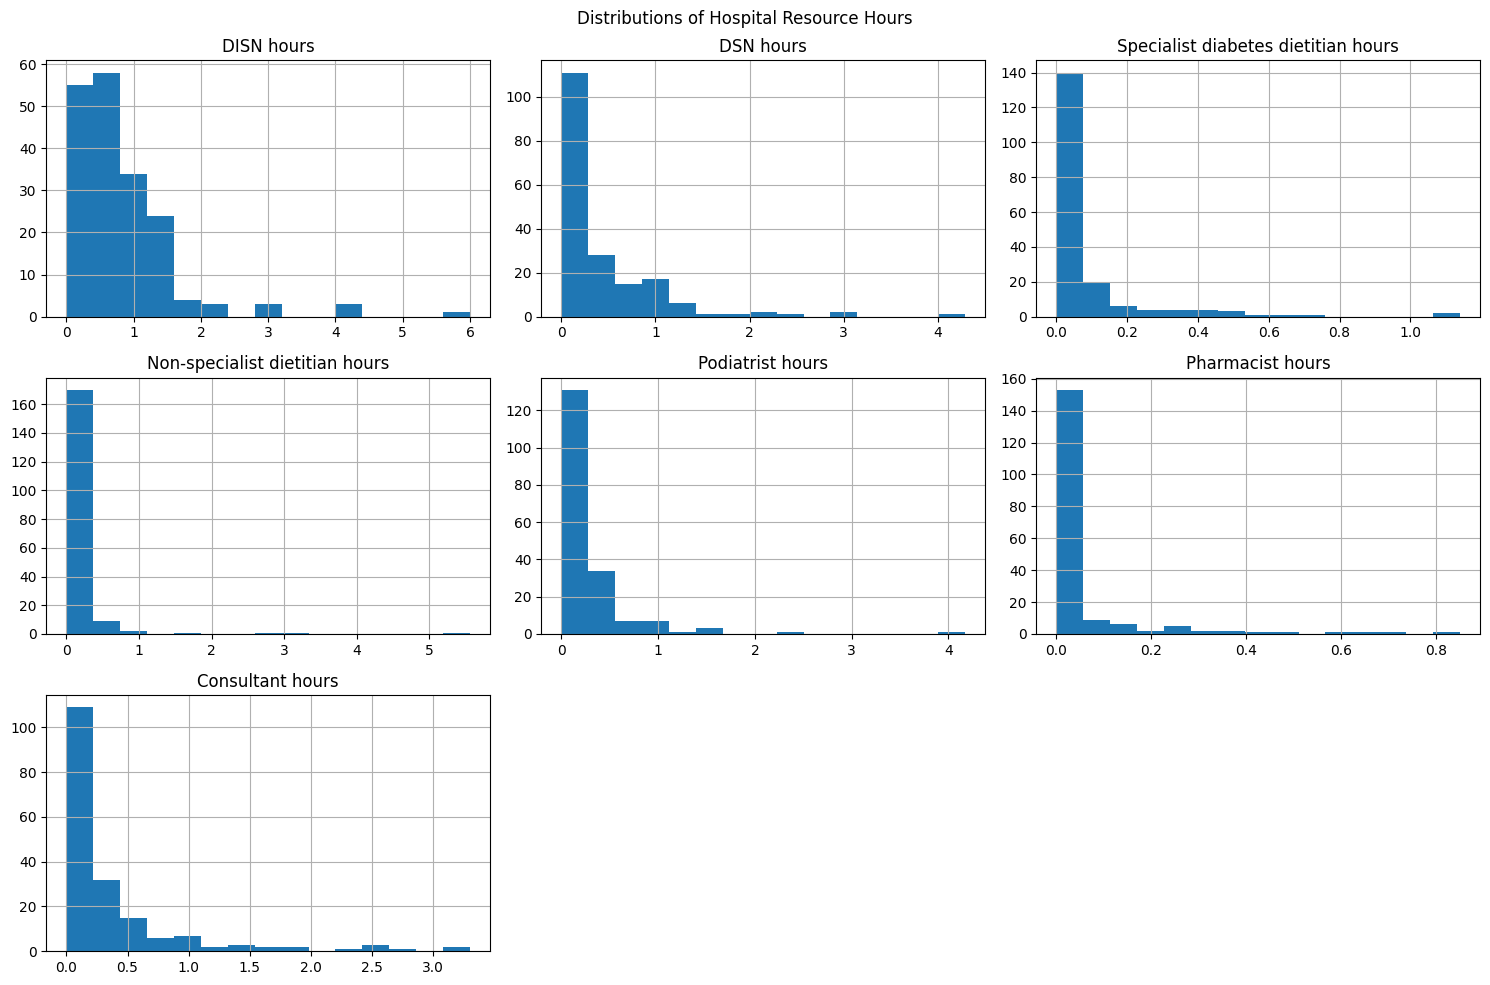

In [91]:
# Histogram for staff hours
numeric_cols = [
    'DISN hours', 'DSN hours', 'Specialist diabetes dietitian hours',
    'Non-specialist dietitian hours', 'Podiatrist hours',
    'Pharmacist hours', 'Consultant hours'
]

df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distributions of Hospital Resource Hours")
plt.tight_layout()
plt.show()


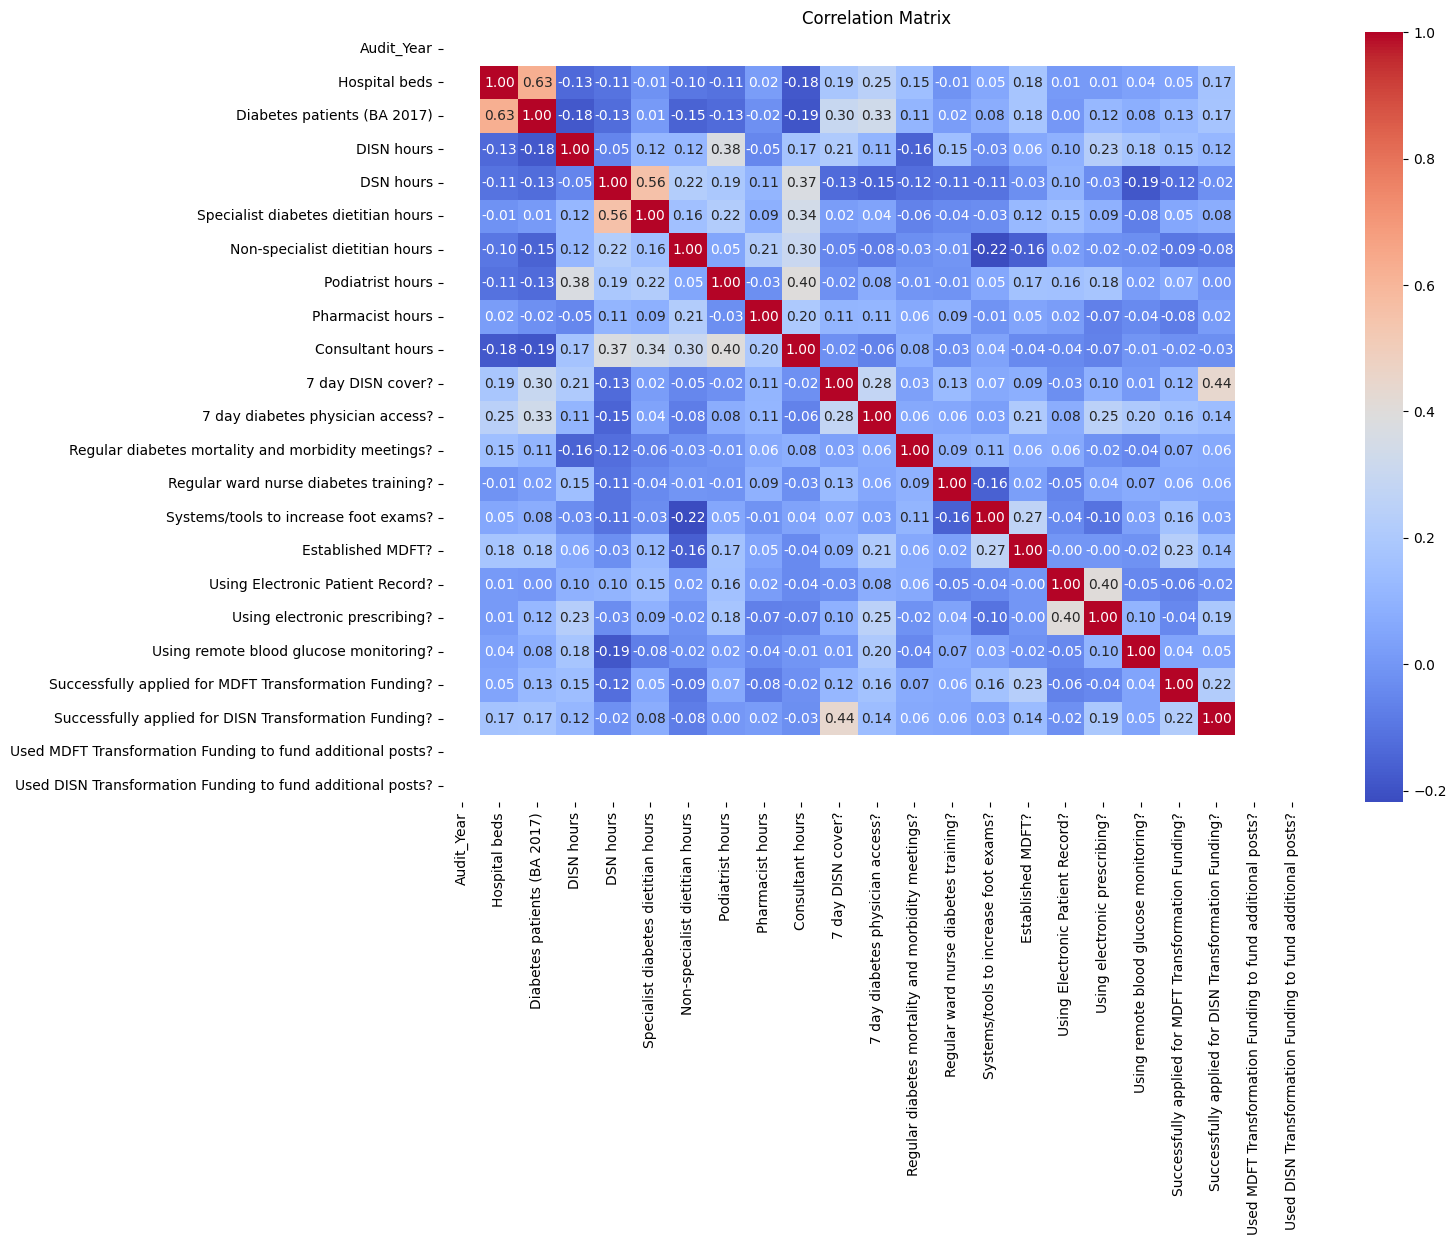

In [92]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


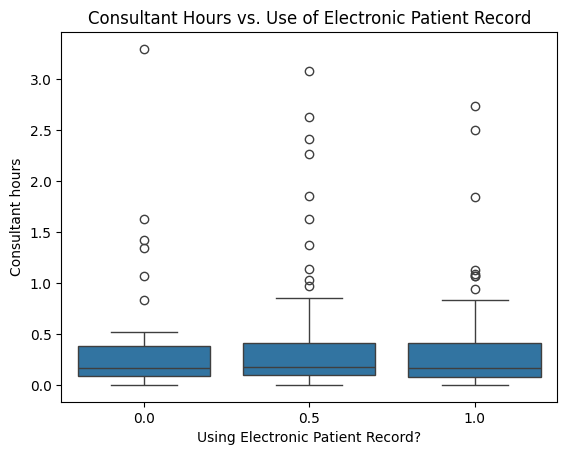

In [93]:
sns.boxplot(x='Using Electronic Patient Record?', y='Consultant hours', data=df)
plt.title("Consultant Hours vs. Use of Electronic Patient Record")
plt.show()


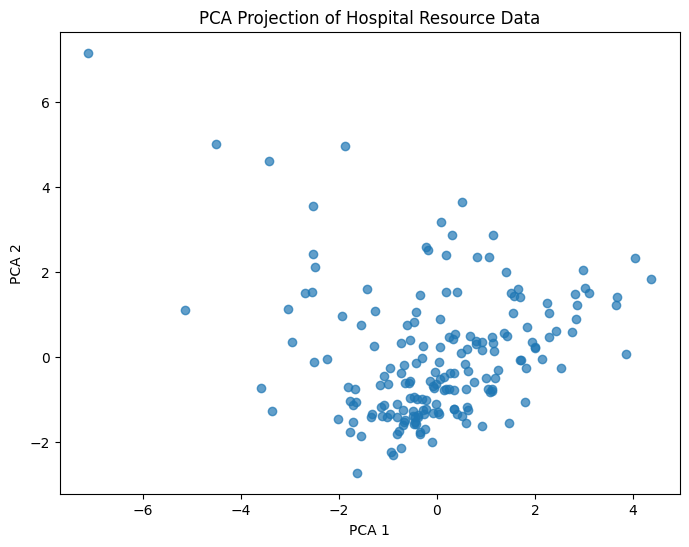

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_cleaned = df.drop(columns=['Used MDFT Transformation Funding to fund additional posts?', 'Used DISN Transformation Funding to fund additional posts?'])

features = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(['Audit_Year'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Hospital Resource Data')
plt.show()

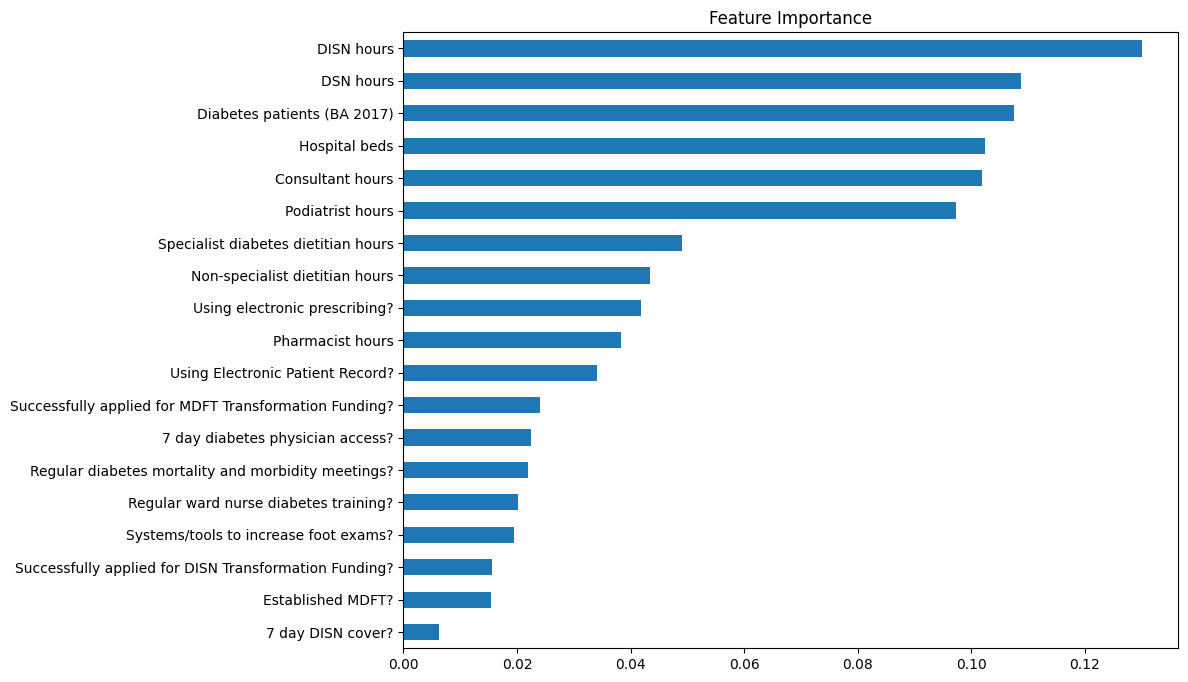

In [95]:
from sklearn.ensemble import RandomForestClassifier

df_cleaned_target = df.dropna(subset=['Using remote blood glucose monitoring?'])

X = df_cleaned_target.select_dtypes(include=['float64', 'int64']).drop(['Audit_Year', 'Using remote blood glucose monitoring?', 'Used MDFT Transformation Funding to fund additional posts?', 'Used DISN Transformation Funding to fund additional posts?'], axis=1)
y = df_cleaned_target['Using remote blood glucose monitoring?']

y = y.map({0.0: 'No', 0.5: 'Partially', 1.0: 'Yes'})

model = RandomForestClassifier(random_state=0)
model.fit(X, y)
importances = model.feature_importances_

# Plot
feat_imp = pd.Series(importances, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(10, 8), title='Feature Importance')
plt.show()

# Model Implementation & Evaluation

In [96]:
df['target'] = df['Using remote blood glucose monitoring?'].apply(lambda x: 1 if x == 1.0 else 0)
display(df['target'].value_counts())

target
1    114
0     71
Name: count, dtype: int64

In [97]:
df = df[~df['target'].isna()]

In [98]:
drop_cols = [
    'Audit_Year',
    'Used MDFT Transformation Funding to fund additional posts?',
    'Used DISN Transformation Funding to fund additional posts?',
    'Using remote blood glucose monitoring?'
]

In [99]:
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=drop_cols, errors='ignore')
y = df['target']

In [100]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify shape
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Target distribution in train set:\n{y_train.value_counts()}")

Train shape: (148, 20), Test shape: (37, 20)
Target distribution in train set:
target
1    91
0    57
Name: count, dtype: int64


In [101]:
imputer = SimpleImputer(strategy='mean')  # You can also try 'median'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# XGBoost Model Implementation & Evaluation

In [102]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_imputed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [103]:
y_pred = lr.predict(X_test_imputed)
y_proba = lr.predict_proba(X_test_imputed)[:, 1]

In [104]:
print("Classification Report:")
print(classification_report(y_test.astype(int), y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        23

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



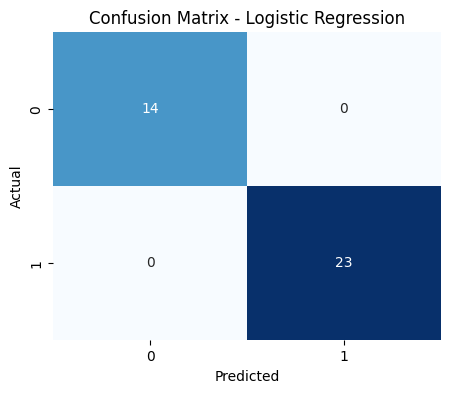

In [105]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

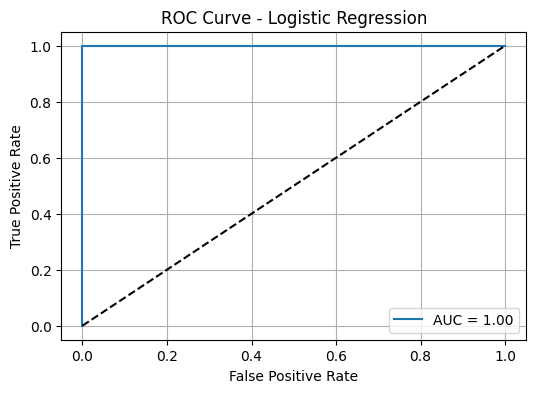

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Model Implementation & Evaluation

In [107]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [108]:
#  Predict with Random Forest
y_pred_rf = rf.predict(X_test_imputed)
y_proba_rf = rf.predict_proba(X_test_imputed)[:, 1]

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        23

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



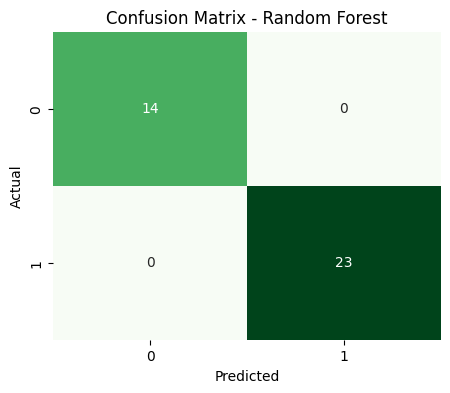

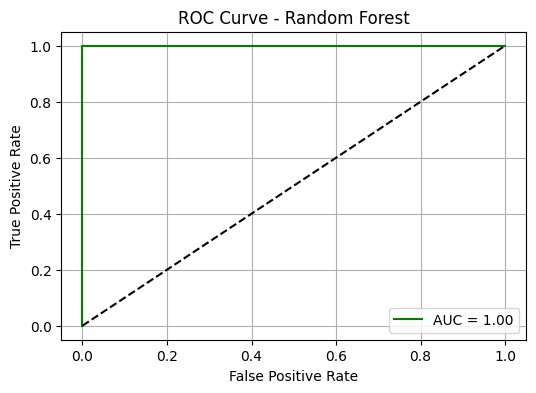

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

#  Evaluate Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_score_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_score_rf:.2f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree Model Implementation & Evaluation

In [110]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=42)

In [111]:
#  Predict with Decision Tree
y_pred_dt = dt_model.predict(X_test_imputed)
y_proba_dt = dt_model.predict_proba(X_test_imputed)[:, 1]

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        23

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



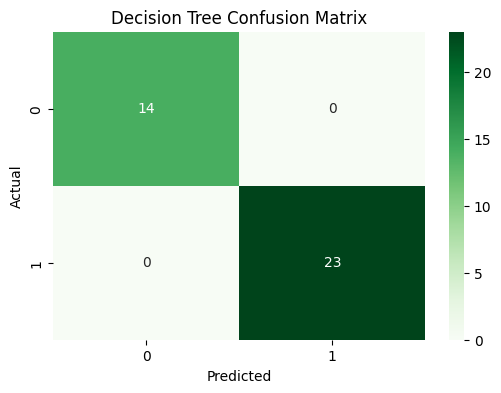

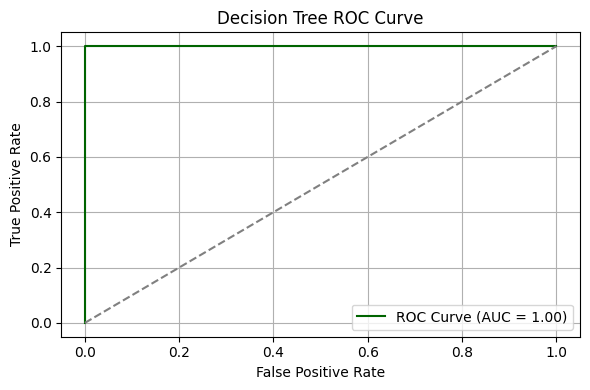

In [112]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Decision Tree
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
auc_score = roc_auc_score(y_test, y_proba_dt)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# XGBoost Model Implementation & Evaluation

In [113]:
import xgboost as xgb

# Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_imputed, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [117]:
# Predict with XGBoost
y_pred_xgb = xgb_model.predict(X_test_imputed)
y_proba_xgb = xgb_model.predict_proba(X_test_imputed)[:, 1]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        23

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



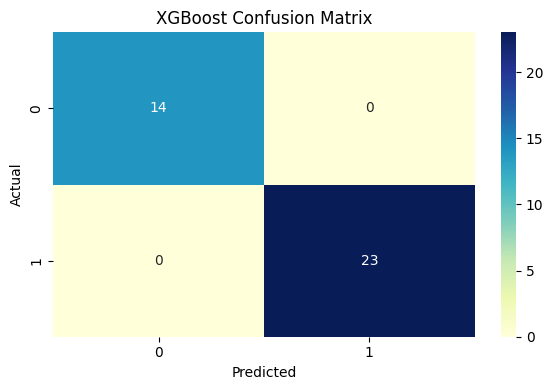

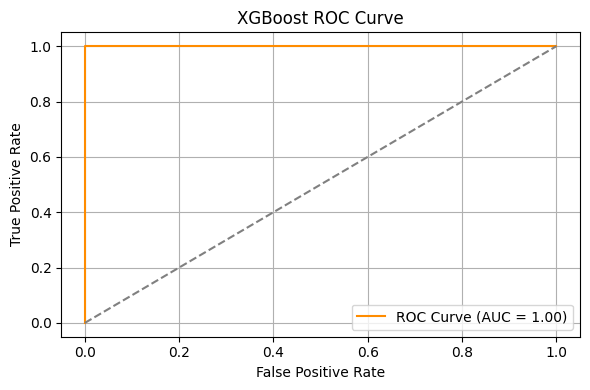

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate XGBoost
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
auc_score = roc_auc_score(y_test, y_proba_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

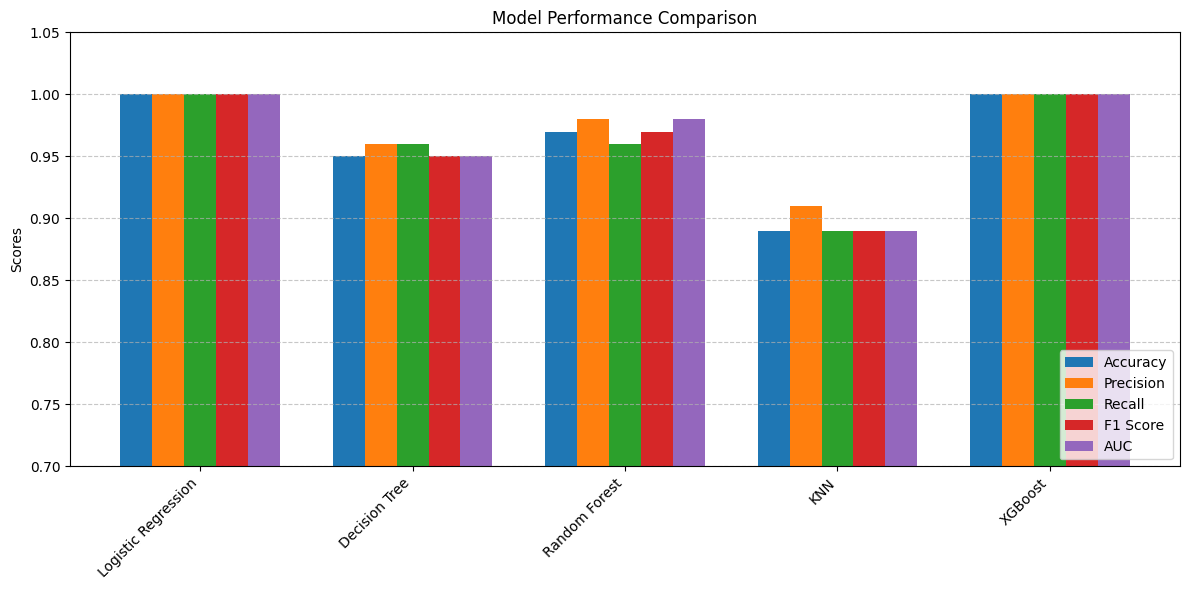

In [116]:
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "XGBoost"]
accuracy = [1.00, 0.95, 0.97, 0.89, 1.00]
precision = [1.00, 0.96, 0.98, 0.91, 1.00]
recall = [1.00, 0.96, 0.96, 0.89, 1.00]
f1 = [1.00, 0.95, 0.97, 0.89, 1.00]
auc = [1.00, 0.95, 0.98, 0.89, 1.00]

# Plotting performance metrics
x = np.arange(len(model_names))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1, width, label='F1 Score')
rects5 = ax.bar(x + 2*width, auc, width, label='AUC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.set_ylim(0.7, 1.05)
ax.legend(loc='lower right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
